In [1]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Load csv file into dataframe (df)
df = pd.read_csv('FAOSTAT_data_en_1-1-2023.csv',encoding_errors='ignore')

# Display first 5 records
df.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1961,1961,tonnes,38049.0,A,Official figure
1,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1962,1962,tonnes,38885.0,A,Official figure
2,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1963,1963,tonnes,40251.0,A,Official figure
3,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1964,1964,tonnes,41566.0,A,Official figure
4,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1965,1965,tonnes,44665.0,A,Official figure


# DESCRIPTIVE STATISTICS

## Ireland

In [3]:
df_ireland = df.loc[df["Area"] == 'Ireland']

In [4]:
df_ireland["Value"].mean()

279607.3867837079

In [5]:
df_ireland["Value"].median()

23500.805

In [6]:
df_ireland["Value"].mode()

0    0.0
Name: Value, dtype: float64

In [7]:
# Variance : S²
df_ireland["Value"].var()

674990963988.973

In [8]:
# Standard Deviation : S
df_ireland["Value"].std()

821578.337098157

## Rest of countries

In [9]:
df_not_ireland = df.loc[df["Area"] != 'Ireland']

In [10]:
df_not_ireland["Value"].mean()

557278.4293176632

In [11]:
df_not_ireland["Value"].median()

42045.0

In [12]:
df_not_ireland["Value"].mode()

0    0.0
Name: Value, dtype: float64

In [13]:
# Variance : S²
df_not_ireland["Value"].var()

4762187406256.171

In [14]:
# Standard Deviation : S
df_not_ireland["Value"].std()

2182243.663355715

# inferential statistics
## Time series analysis 

Text(0.5, 1.0, 'Skim Milk of Cows Ireland Time Series')

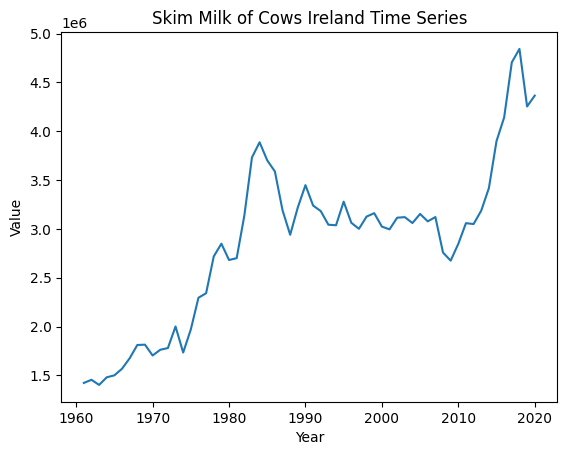

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 
df_ireland = pd.read_csv('TimeSeries_skim_milk_of_cows_ireland.csv')
df_europe = pd.read_csv('TimeSeries_skim_milk_of_cows_europe.csv')

sns.lineplot(df_ireland, x="Year", y="Value")
plt.ylabel('Value')
plt.xlabel('Year')
plt.title("Skim Milk of Cows Ireland Time Series")

Text(0.5, 1.0, 'Skim Milk of Cows Europe Time Series')

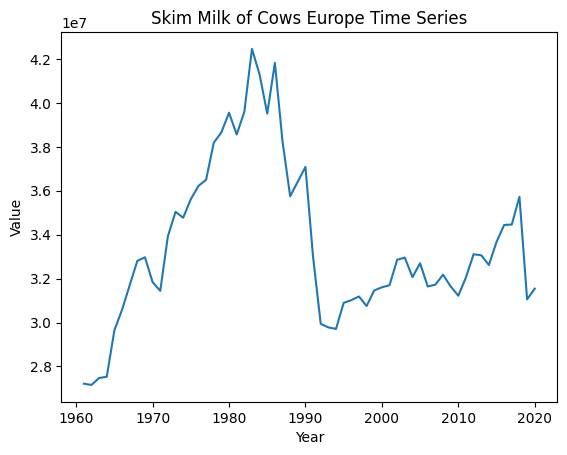

In [16]:
sns.lineplot(df_europe, x="Year", y="Value")
plt.ylabel('Value')
plt.xlabel('Year')
plt.title("Skim Milk of Cows Europe Time Series")

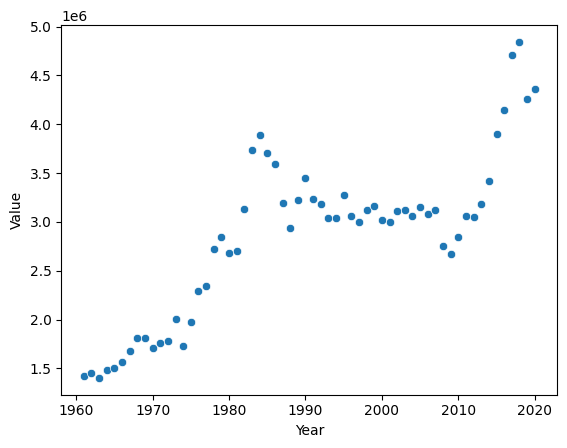

In [17]:
ax = sns.scatterplot(x="Year", y="Value", data=df_ireland)

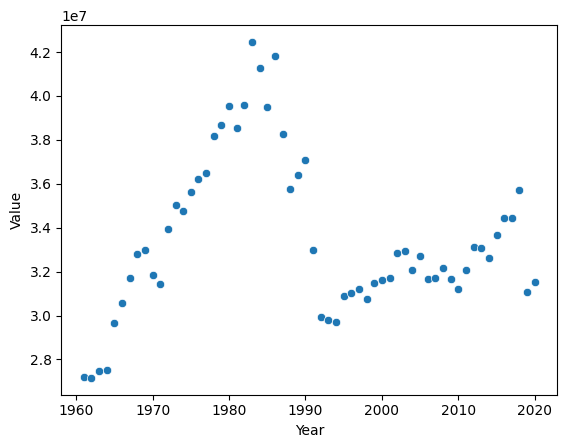

In [18]:
ax = sns.scatterplot(x="Year", y="Value", data=df_europe)

## poisson distribution¶
based on a given St Stephens Green street, what is the probability of a given number of parking bays to be suspended in a given day

If we take the total days for the dataset, and calculate the number of parking bays for a given street during the same period od time we can get the average number of parking bays per day



In [19]:
# Dataset started on.....

Total_Years = df_ireland["Year"].nunique()

In [20]:
print(Total_Years)


60


In [21]:
df_ireland["Value"].sum()

171533112.31

In [22]:
# The averageof value per year
mu = df_ireland["Value"].sum() / Total_Years
print(mu)

2858885.205166667


In [23]:
from scipy.stats import poisson

# mu = average
# size = number of xamples

#generate random values from Poisson distribution with mean=mu and sample size=200
poisson.rvs(mu=mu, size=200)

array([2860738, 2859214, 2860732, 2859649, 2858207, 2857155, 2859023,
       2856176, 2859691, 2859301, 2862445, 2861153, 2856727, 2859787,
       2857685, 2858210, 2859179, 2859117, 2859439, 2855618, 2857222,
       2861085, 2861240, 2860363, 2862001, 2858928, 2857635, 2858518,
       2857439, 2859329, 2859677, 2862528, 2857115, 2856770, 2857255,
       2858010, 2860680, 2861281, 2854679, 2857695, 2857554, 2857646,
       2860649, 2859136, 2859799, 2856578, 2859239, 2858666, 2859443,
       2856416, 2855949, 2858796, 2857722, 2859067, 2858287, 2860426,
       2857684, 2860002, 2860135, 2858539, 2862085, 2860384, 2860196,
       2854048, 2858098, 2858803, 2857336, 2856949, 2861524, 2858937,
       2858110, 2856874, 2861525, 2857473, 2859211, 2860720, 2860381,
       2856546, 2859554, 2855845, 2859673, 2860887, 2858600, 2858006,
       2861836, 2861824, 2858021, 2859663, 2857562, 2859543, 2860077,
       2858911, 2856548, 2858655, 2858623, 2856410, 2857911, 2857303,
       2858783, 2857

In [24]:
# Probability Equal to Zero
from scipy.stats import poisson
# EXACT NUMBER

# mu = average
# k = value we are looking for 

#calculate probability
poisson.pmf(k=0, mu=mu)



0.0

In [25]:
# Probability Less than 2850000
from scipy.stats import poisson

# LESS or EQUAL
#calculate probability
poisson.cdf(k=2850000, mu=mu)


7.309799094249581e-08

In [26]:
# Probability Greater than  2850000 and less than 2860000 
from scipy.stats import poisson

poisson.cdf(k=2860000, mu=mu) - poisson.cdf(k=2850000, mu=mu)

0.7452677293204444

(array([6.98866284e-07, 3.96024227e-06, 2.63239633e-05, 9.45022519e-05,
        1.88150334e-04, 2.29228141e-04, 1.57400217e-04, 5.92483305e-05,
        1.49091474e-05, 2.09659885e-06]),
 array([2852051. , 2853338.8, 2854626.6, 2855914.4, 2857202.2, 2858490. ,
        2859777.8, 2861065.6, 2862353.4, 2863641.2, 2864929. ]),
 <BarContainer object of 10 artists>)

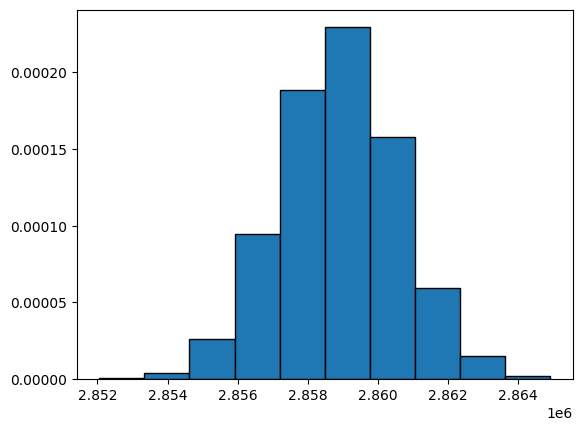

In [27]:
# Plot a Poisson Distribution
from scipy.stats import poisson
import matplotlib.pyplot as plt


#generate Poisson distribution with sample size 10000
x = poisson.rvs(mu=mu, size=10000)

#create plot of Poisson distribution
plt.hist(x, density=True, edgecolor='black')

# parametric and non-parametric inferential statistical 

In [28]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = df_ireland["Value"]
data2 = df_europe["Value"]
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
Different distribution (reject H0)


# ANOVA (ANalysis Of VAriance)
https://www.cienciadedatos.net/documentos/pystats09-analisis-de-varianza-anova-python.html

## Número de grupos, observaciones por grupo y distribución de las observaciones

In [29]:
# La siguiente tabla contiene una muestra de valores de produccion anual 
df_anova_europe = pd.read_csv('ANOVA_skim_milk_of_cows_europe.csv')


In [30]:
df_anova_europe.head()

,Unnamed: 0,Area,Value
0,0,Austria,1135648.0
1,1,Austria,1151012.0
2,2,Austria,1154600.0
3,3,Austria,1143560.0
4,4,Austria,1139880.0


In [31]:
# Se identifica el número de grupos y cantidad de observaciones por grupo para determinar si es un modelo equilibrado. También se calculan la media y desviación típica de cada grupo
df_anova_europe.groupby('Area').agg(['mean', 'std'])


Unnamed: 0                    Value              
              mean        std          mean           std
Area                                                     
Austria       29.5  17.464249  1.071972e+06  6.472262e+04
France        89.5  17.464249  1.110647e+07  1.338626e+06
Germany      148.5  16.886879  1.493776e+07  3.067757e+06
Ireland      207.5  17.464249  2.858885e+06  8.437775e+05
Italy        266.5  16.886879  2.562564e+06  6.800300e+05
Spain        325.5  17.464249  1.111808e+06  7.618079e+05

Dado que el número de observaciones por grupo no es constante, se trata de un modelo no equilibrado. Es importante tenerlo en cuenta cuando se comprueben las condiciones de normalidad y homocedasticidad.

## Análisis gráfico
Dos de las representación más útiles antes de realizar un ANOVA son los gráficos Box-Plot y los Violin-Plot.



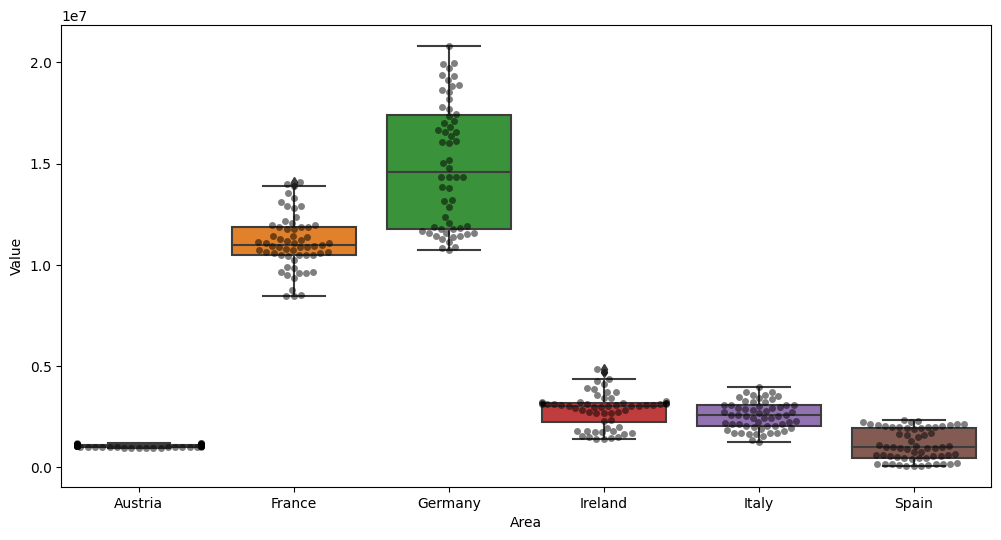

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(x="Area", y="Value", data=df_anova_europe, ax=ax)
sns.swarmplot(x="Area", y="Value", data=df_anova_europe, color='black', alpha = 0.5, ax=ax);

Este tipo de representación permite identificar de forma preliminar si existen asimetrías, datos atípicos o diferencia de varianzas. En este caso, los 4 grupos parecen seguir una distribución simétrica. En el nivel IF se detectan algunos valores extremos que habrá que estudiar con detalle por si fuese necesario eliminarlos. El tamaño de las cajas es similar para todos los niveles por lo que no hay indicios de falta de homocedasticidad.


## Verificar condiciones para un ANOVA

#### Independencia

Los grupos (variable categórica) y jugadores dentro de cada grupo son independientes entre ellos ya que se ha hecho un muestreo aleatorio de jugadores de toda la liga (no solo de un mismo equipo).


#### Distribución normal de las observaciones

La variable cuantitativa debe de distribuirse de forma normal en cada uno de los grupos. El estudio de normalidad puede hacerse de forma gráfica (qqplot) o con test de hipótesis.



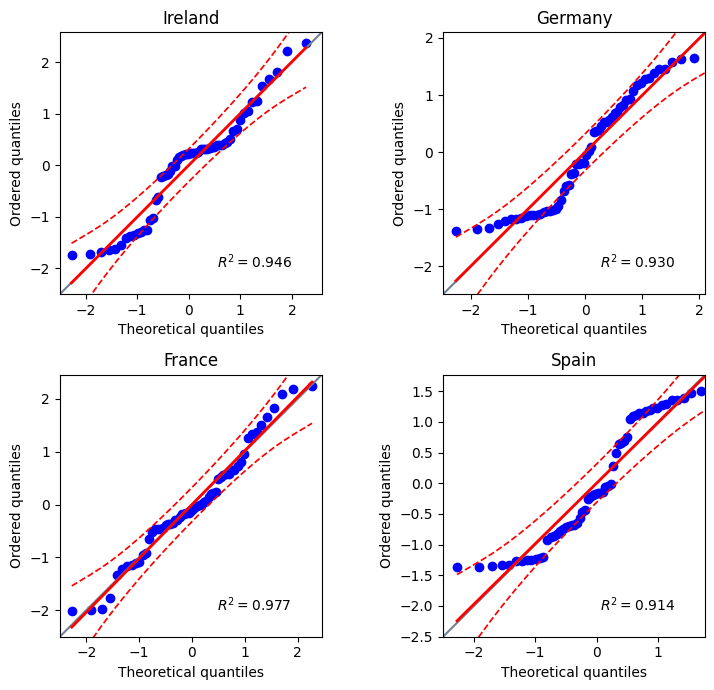

In [45]:
# Gráficos qqplot
# ==============================================================================
import pingouin as pg

fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(df_anova_europe.loc[df_anova_europe.Area=='Ireland', 'Value'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('Ireland')
pg.qqplot(df_anova_europe.loc[df_anova_europe.Area=='Germany', 'Value'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('Germany')
pg.qqplot(df_anova_europe.loc[df_anova_europe.Area=='France', 'Value'], dist='norm', ax=axs[1,0])
axs[1,0].set_title('France')
pg.qqplot(df_anova_europe.loc[df_anova_europe.Area=='Spain', 'Value'], dist='norm', ax=axs[1,1])
axs[1,1].set_title('Spain')
plt.tight_layout()

In [34]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df_anova_europe, dv='Value', group='Area')


,W,pval,normal
Area,,,
Austria,0.983608,0.598183,True
France,0.972917,0.202250,True
Germany,0.917592,0.000769,False
Ireland,0.940704,0.005823,False
Italy,0.975446,0.286816,True
Spain,0.898828,0.000119,False


Ni el análisis gráfico ni los test de hipótesis no muestran evidencias de falta de normalidad.

#### Varianza constante entre grupos (homocedasticidad)

Dado que hay un grupo IF que se encuentra en el límite para aceptar que se distribuye de forma normal, el test de Levene más adecuado que el de Bartlett.

In [35]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df_anova_europe, dv='Value', group='Area', method='levene')

,W,pval,equal_var
levene,85.478304,1.617358e-58,False


Acorde al test Levene, no hay evidencias significativas que indiquen falta de homocedasticidad.


## Test ANOVA

In [36]:
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(data=df_anova_europe, dv='Value', between='Area', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Area,1.030100e+16,5,2.060200e+15,967.865454,1.852708e-202,0.932554
1,Within,7.450106e+14,350,2.128602e+12,NaN,NaN,NaN


Un p-value es superior a 0.1 es una evidencia muy dévil en contra de la hipótesis núla de que todos los grupos tienen la misma media. El valor de eta cuadrado ( 𝜂2 ) es de 0.93, lo ue puede considerarse como un tamaño de efecto grande.

## Comparaciones múltiples post-hoc


En este caso, el ANOVA ha resultado significativo, por lo que tiene sentido realizar comparaciones dos a dos.



In [52]:
# Post-hoc Tukey test
# ==============================================================================
pg.pairwise_tukey(data=df_anova_europe, dv='Value', between='Area').round(3)


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Austria,France,1.071972e+06,1.110647e+07,-1.003450e+07,266370.772,-37.671,0.00,-10.521
1,Austria,Germany,1.071972e+06,1.493776e+07,-1.386579e+07,268657.258,-51.611,0.00,-6.405
2,Austria,Ireland,1.071972e+06,2.858885e+06,-1.786913e+06,266370.772,-6.708,0.00,-2.967
3,Austria,Italy,1.071972e+06,2.562564e+06,-1.490592e+06,268657.258,-5.548,0.00,-3.092
4,Austria,Spain,1.071972e+06,1.111808e+06,-3.983594e+04,266370.772,-0.150,1.00,-0.073
5,France,Germany,1.110647e+07,1.493776e+07,-3.831288e+06,268657.258,-14.261,0.00,-1.618
6,France,Ireland,1.110647e+07,2.858885e+06,8.247589e+06,266370.772,30.963,0.00,7.324
7,France,Italy,1.110647e+07,2.562564e+06,8.543910e+06,268657.258,31.802,0.00,7.955
8,France,Spain,1.110647e+07,1.111808e+06,9.994666e+06,266370.772,37.522,0.00,9.119
9,Germany,Ireland,1.493776e+07,2.858885e+06,1.207888e+07,268657.258,44.960,0.00,5.374


Como era de esperar, se encuentra diferencia significativa entre varios pares de medias.


## Conclusión

En el estudio realizado se ha observado un tamaño de efecto grande y la técnicas de inferencia ANOVA han encontrado significancia estadística para rechazar que las medias son iguales entre todos los grupos.
